##### <a id='top'></a>

# Homework 4: Confidence intervals and other things
***

**Name**: 

***

This assignment is due on Moodle by **11:59 PM on Friday November 8**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4)

---

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
%matplotlib inline

In [85]:
# since we are probs going to use std a lot
def calcstd(calcstdvar):
    avg = 0
    for i in calcstdvar:
        avg += i
    avg /= len(calcstdvar)
    stdc = 0
    for i in calcstdvar:
        stdc += (i-avg)**2
    stdc /= (len(calcstdvar)-1)
    stdc = np.sqrt(stdc)
    return stdc

---

<a id='p1'></a>
[Back to top](#top)

### [30 points] Problem 1 - Are sea-levels changing?

You have been contacted by the local government of New York City, to assess whether there is statistical evidence for sea-level rise in the area. You obtain from the University of Hawaii Sea Level Center's [gigantic repository of sea-level data](https://uhslc.soest.hawaii.edu/data/?rq) the daily mean sea levels file (posted on Canvas).

In this problem, you will:
1. practice calculating confidence intervals, 
1. practice wrangling a real-life data set into a form where you can actually compute these confidence intervals, because life will rarely be so kind as to simply hand you a nicely packaged and cleaned set of data, and
1. save NYC and the Statue of Liberty from a watery fate?

In [115]:
# Local and web paths to the data; pick which works for you.
filepath = "sealevel_newyork.csv"

dfSL = pd.read_csv(filepath, header=None)
dfSL.rename(columns={0 : 'Year', 1 : 'Month', 2 : 'Day', 3 : 'SL'}, inplace=True)
dfSL.head(50)

,Year,Month,Day,SL
0,1920,6,2,1593
1,1920,6,3,1605
2,1920,6,4,1617
3,1920,6,5,1779
4,1920,6,6,1722
5,1920,6,7,1594
6,1920,6,8,1639
7,1920,6,9,1699
8,1920,6,10,1690
9,1920,6,11,1622


**Part A:**  Write a function `clean_data` to:
1. take in a single argument of a raw sea level data frame (e.g., `dfSL` above),
2. compute the fill-value used to replace missing sea level (SL) data (**not** hard-coded!),
3. use the Pandas `DataFrame.dropna` method to remove all missing rows of data, 
4. select only the data point on the second day of each month, and
4. return a cleaned Pandas data frame.

Use your shiny new function to clean the `dfSL` data frame and save the results in a new data frame.

There is a very specific reason to sample only one daily data point per month. We will talk about it later.

In [127]:
def clean_data(df):
    
    # if the sea level is negative then drop it
    df.loc[df['SL'] < 0] = np.nan
    # if the day is not 2 the drop it
    df.loc[df['Day'] != 2] = np.nan
    # drop all nan
    dfClean = df.dropna()
    # return the data
    return dfClean

dfClean = clean_data(dfSL)
dfClean.head(50)

,Year,Month,Day,SL
0,1920.0,6.0,2.0,1593.0
30,1920.0,7.0,2.0,1710.0
61,1920.0,8.0,2.0,1662.0
92,1920.0,9.0,2.0,1585.0
122,1920.0,10.0,2.0,1521.0
153,1920.0,11.0,2.0,1704.0
183,1920.0,12.0,2.0,1398.0
214,1921.0,1.0,2.0,1686.0
245,1921.0,2.0,2.0,1530.0
273,1921.0,3.0,2.0,1541.0


In [129]:
len(dfClean)

1003

**Part B:**  Plot the cleaned time series of sea levels. Be sure to label your axes, including units. The UHSLC data portal includes a link to the metadata accompanying our data set; if you are not sure about units, that would be a good place to start looking. For the $x$-axis, place the $x$ tick marks on January 1 of each year that is divisible by 10 (i.e., 1920, 1930, ...), and label with that year. You may need to do additional processing in order to grab these indices. 


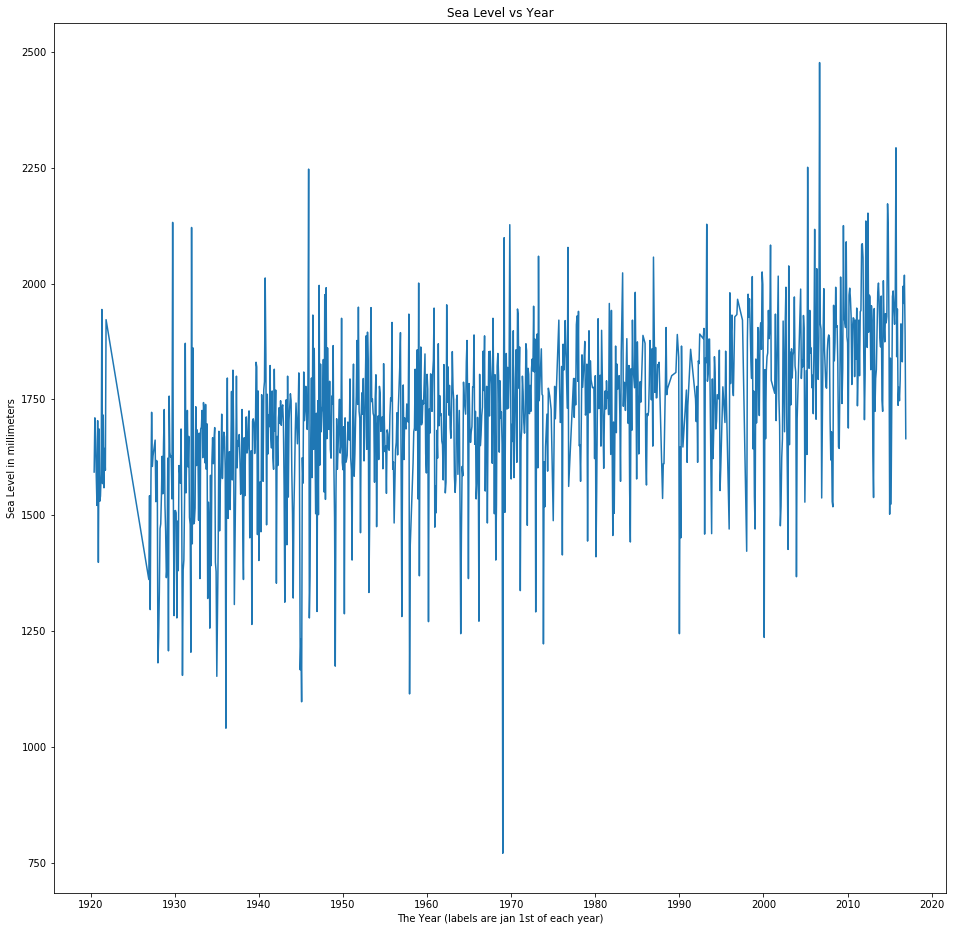

In [192]:
# plot the data
fig, ax = plt.subplots(figsize=(16,16))
# use the year and the month /12 to plot the data since this will give
# you the fraction through the year you are and therefore seperate all
# the data by year and month and smoothly plot it
ax.plot(dfClean['Year']+(dfClean['Month']/12), dfClean['SL'])
# so you want jan first from 1920 every ten years so I make a list
# of jan first every 10 years, since the data plots month by month/12
# the .08 accurately represents jan first each year
year = 1920.0 + (1.0/12.0) - (1.0/365.0)
years = []
while year <= 2025:
    years.append(year)
    year += 10
# with that list I make the x ticks
plt.xticks(years)
# now label everything
ax.set_title("Sea Level vs Year")
ax.set_ylabel("Sea Level in millimeters")
ax.set_xlabel("The Year (labels are jan 1st of each year)")
# write a random print statement bc otherwise it prints random disgusting table stuff
print()

**Part C:** Use your cleaned sea levels data frame to create two new Pandas data frames or series:
1. one object to contain the sea levels between (and including) the years 1986 and 1995, and
2. another object to contain the sea levels between (and including) the years 2006 and 2015.

Then, create a single-panel figure that includes density histograms of each of the two decades of sea levels. Be sure to label everything appropriately.

Finally, based on the data in front of you, formulate and state a hypothesis about how the mean sea level in the decade 2006-2015 compares to the mean sea level in the decade 1986-1995.

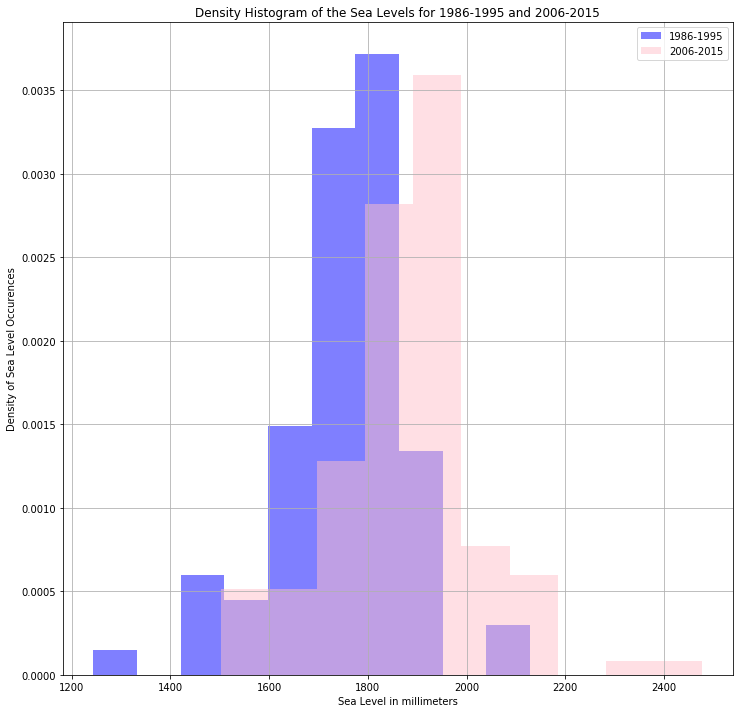

In [193]:
# seperate the data into two different data sets
firstdf = dfClean.loc[(dfClean['Year'] >= 1986) & (dfClean['Year'] <= 1995)]
seconddf = dfClean.loc[(dfClean['Year'] >= 2006) & (dfClean['Year'] <= 2015)]
# plot the data
fig, ax = plt.subplots(figsize=(12,12))
firstdf.hist(column='SL', ax=ax, density=True, fc="blue", alpha=0.5)
seconddf.hist(column='SL', ax=ax, density=True, fc='pink', alpha=0.5)
ax.legend(['1986-1995', '2006-2015'])
ax.set_ylabel("Density of Sea Level Occurences")
ax.set_xlabel("Sea Level in millimeters")
ax.set_title("Density Histogram of the Sea Levels for 1986-1995 and 2006-2015")
# agian, the stuff is ugly so a random print statement
print()

It deffinetly appears as though each of the points from the previous decade was just shifted right, therefore it seems likely that the mean has also shifted right and the 2006-2015 decade has a higher average sea level then 1986-1995.<br>
Hypothesis:<br>
$$
H_0 = \mu_1 - \mu_2 = 0\\
H_\alpha = \mu_1 - \mu_2 > 0
$$
Where mu 1 is the first decade and mu 2 is the second decade. The null hypothesis is that they are equal, and the rejection is that the sea level is greater.

**Part D:** Compute a 99.9% confidence interval for each of (1) the mean sea level in the 1986-1995 decade ($\mu_{1986-1995}$) and (2) the mean sea level in the 2006-2015 decade ($\mu_{2006-2015}$).  You may use Python for arithmetic operations and executing the calculations, but the relevant steps/set-up should be displayed in Markdown/MathJax.

Based on these two confidence intervals, do you think there is sufficient evidence to conclude that there is or is not a significant difference in the mean sea level between 1986-1995 and 2006-2015? Justify your answer. 

In [190]:
# calculate the means
x1 = firstdf['SL'].mean()
x2 = seconddf['SL'].mean()
# calculate z stat
z = stats.norm.ppf(.9995)
# calculate standard deviation
s1 = calcstd(firstdf['SL'])
s2 = calcstd(seconddf['SL'])
# calculate size
n1 = len(firstdf['SL'])
n2 = len(seconddf['SL'])
# and finally the confidence interval
lower1 = x1 - (z*s1/np.sqrt(n1))
upper1 = x1 + (z*s1/np.sqrt(n1))
lower2 = x2 - (z*s2/np.sqrt(n2))
upper2 = x2 + (z*s2/np.sqrt(n2))
# print results
print("For the first set: [",lower1,",",upper1,"]")
print("For the second set: [",lower2,",",upper2,"]")

For the first set: [ 1695.1938365738397 , 1800.01668974195 ]
For the second set: [ 1833.2545284841256 , 1925.078804849208 ]


confidence interval is $\bar x \pm z_{\alpha/2}*\frac{\sigma}{\sqrt n}$
So xbar will be calculated from the data frame. zalpha is the cdf(1-0.001/2) which is cdf(.9995) which will be calculated in python above. sigma will use the formula $\sum (x_i - \bar x)^2/n$ to calculate standard deviation above and plug into equation in python. The finally n will by computed using python and will be the sample size. This will all be done seperately for both data sets in the python code above. The results of the python code are for 1986-1995 the CI is [1695.2, 1800.0] and for 2006-2015 [1833.3, 1925.1]. Seems like since the intervals don't overlap there could be. However just computing the confidence interval of both isn't a very good test. This just means that both intervals have an extremely high chance of containing the mean so there is probably a higher mean in the later years. 

**Part E:**  Compute a 99.9% confidence interval for the ***difference in mean sea level*** between the 2006-2015 and the 1986-1995 decades ($\mu_{2006-2015} - \mu_{1986-1995}$. Based on this, make a conclusion regarding your hypothesis from **Part C**, and compare to what your results in **Part D** implied. You may use Python for arithmetic operations and executing the calculations, but the relevant steps/set-up should be displayed in Markdown/MathJax.

In [191]:
# using the data from part D
SE = (s2**2)/n2
SE += (s1**2)/n1
SE = np.sqrt(SE)
lower = x2 - x1 - (z*SE)
upper = x2 - x1 + (z*SE)
print("Our confidence interval is: [",lower,",",upper,"]")

Our confidence interval is: [ 61.88441972597211 , 201.23838729157177 ]


To compute the 99.9% confidence interval in the difference of means, you use the formula ${\bar x_2 - \bar x_1}\pm z_{\alpha/2}{\sqrt{\frac{\sigma_2^2}{n_2}+\frac{\sigma_1^2}{n_1}}}$, which uses the same means and standard deviation and size from part D. So we will do basically the same thing as part D and plug this formula into python. Our confidence interval is [61.88,201.24] which means that there is probably a rise in sea level.

**Part F:**  The confidence intervals from **Parts D** and **E** were derived using the Central Limit Theorem.  Which assumption of the Central Limit Theorem would likely be violated if we took more than one measurement per month to form our samples, and why?

If we took data from more than one day per month, then the data points would likely not be independent, since sea level is usually dependent on the day before. Therefore violating the assumption of independence.

---

<a id='p2'></a>
[Back to top](#top)

### [25 points] Problem 2 - Waiting for the Bus

You are waiting for the bus, and are rather impatient.
Your friend tells you that busses arrive according to an exponential distribution with parameter $\lambda=1/10$ (busses/min) for a *mean* waiting time of 10 minutes.  You've been waiting for a while, and want to prove their hypothesis wrong: you're thinking the wait is longer than that (one-tailed).
		
(Note: You may use the approximation $e^3\approx20$ when applicable on this problem.  You may do calculations in Python if you wish, but all exposition should be in markdown.)

**Part A:** State the null and alternative hypotheses being tested.

$H_0$ is $\mu=10, H_\alpha$ is $\mu > 10$

**Part B:** Devise a test of the form "reject if $X>c$" where $c$ is how long you have to wait until the bus arrives.  Use a significance of $\alpha= .05$.  How long do you wait before you reject the null hypothesis with a probability of type I error of 5%?

$\lambda e ^{-\lambda x} = \frac{1}{10}e^{-x/10}$ Which is our exponential function for the wait time. <br>Now we compute the 1-cdf which will give us the probability it arrives after a time t. <br>
$ 1-\int_0^t\frac{1}{10}e^{-x/10}dx = 1-(-e^{-x/10}\rvert_0^t)=e^{-t/10}$<br>
In order to reject our null hypothesis this probability must be greater than 0.05 therefore we want when t gives a probability greater than 0.05. <br>
$$
0.05 = e^{-t/10} \\
ln(0.05) = -t/10 \\ 
-10ln(0.05) = t \\
t = 29.9573
$$
Therefore you have to wait 29.9573 minutes and then you can reject the null hypothesis.

**Part C:** What is the power of your test if the true rate is $\lambda=1/60$?  (NB: **Power** is defined as the complement of making a Type II Error: it's the rate at which you correctly reject a false null hypothesis)

If the true rate is 1/60, then the pdf is now <br>
$\frac{1}{60}e^{-x/60}$ <br>
Therefore our cdf for the probability it arrives after a time (using same process from b except plugging in 60 instead of ten) is <br>
e^{-t/60} <br>
So if we plug in our t <br>
$e^{-29.9573/60} = 0.6070$ <br>
So our power is 0.6070

**Part D:** It turns out neither the null nor alternative are correct!  The *true* distribution of busses was a continuous uniform distribution with pdf
$$f(x)=\begin{cases}
		\frac{1}{60} & 0<x<60 \, min\\
		0 & else
		\end{cases}$$
		
What is the probability that you reject the null hypothesis?  What's different about this and how we've been discussing power/Type II error rates?

Using the same process as part C, except now the probability of t will be for a uniform distribution which will be<br>
$$
1-\int_0^t 1/60 dt\\
1-(t/60 \rvert_0^t)\\
1-t/60
$$
And we plug in our t from before<br>
$1-29.9573/60 = 0.5007$<br>
So the probability we reject is 50.07%
The distribution is different, we have non normal functions and exponentials instead. Usually when we calculate the errors we assume the underlying distribution is normal but here we know that it actually isn't.

---

<a id='p3'></a>
[Back to top](#top)

### [30 points] Problem 3 - Exploring Confidence Intervals 

The [Gumbel](https://en.wikipedia.org/wiki/Gumbel_distribution) distribution is one of several distributions frequently used to model environmental extremes (for example, extreme temperatures and sea levels).  It is also fairly asymmetric, and thus interesting for investigating confidence intervals.  It is implemented in scipy.stats as [gumbel_r](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gumbel_r.html), where the appendix "\_r" denotes the right-skewed version of the Gumbel distribution (as opposed to the left-skewed).

**Part A**: Complete the following code cell to plot a histogram of 100 realizations from the Gumbel distribution with parameters $\mu=12$ and $\beta=3$.  Be sure to leave this cell executed before turning in your assignment! Make your histogram grey with gold edges.

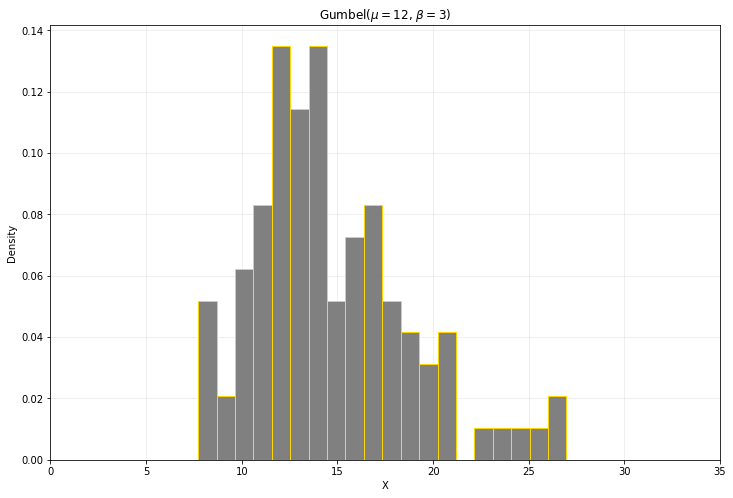

In [75]:
# whelp, don't have to do anything because the solution was left in here :)
mu = 12
beta = 3
n_sample = 100
x = stats.gumbel_r.rvs(loc=mu, scale=beta, size=n_sample)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
plt.hist(x, color="grey",edgecolor="gold", bins=20, density=True)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xlabel('X')
ax.set_ylabel('Density')
ax.set_title(r'Gumbel($\mu=${}, $\beta=${})'.format(mu,beta))
plt.xlim([0,35])
plt.show()

**Part B:** Look up the analytical mean and variance of the Gumbel distribution with parameters $\mu=12$ and $\beta=3$ and calculate them here by hand.  Note that the Euler–Mascheroni constant can be accessed via `np.euler_gamma`. 

Use the empirical mean from your sample in **Part A**, and the true variance of the Gumbel distribution to compute by hand a 99% confidence interval for the mean.

In [35]:
print("Euler-Mascheroni", np.euler_gamma)
print("Empirical mean", np.mean(x))
print("z alpha", stats.norm.ppf(1-(.01/2)))
13.8431 + (2.57583*np.sqrt(14.8044)/10)

Euler-Mascheroni 0.5772156649015329
Empirical mean 13.843126046276831
z alpha 2.5758293035489004


14.834188877732725

mean = $\mu + \beta \gamma = 12 + 3*0.577216 = 13.7316$ <br>
variance = $\frac{\pi^2 \beta^2}{6} = \frac{\pi^2 3^2}{6} = 14.8044$ <br>
99% confidence interval = $\bar x \pm z_{\alpha/2}\frac{\sigma}{\sqrt n} = 13.8431 \pm 2.57583*\frac{\sqrt{14.8044}}{\sqrt{100}} = [12.85,14.83]$

**Part C:  A theoretical interlude.** When Stella O'Flaherty (the famous octopus) ran her solution code for **Part B**, she obtained a 99% confidence interval of $[12.73,  14.72]$ for the mean of the $Gum(\mu=12, \beta=3)$ distribution. For each of the following, explain why or why not the situation described is correct, given the technical definition of a 99% confidence interval we went over in class.

**(i)** If you had no other evidence regarding true mean of the $Gum(\mu=12, \beta=3)$ distribution, you could say there is a 99% chance that its true mean falls between 12.73 and 14.72.

**(ii)** If a class of 100 students all construct 99% confidence intervals for the mean of the $Gum(\mu=12, \beta=3)$ distribution, then we expect about 99 of their CIs to contain the true mean, and about 1 of them to miss the true mean.

**(iii)** There is a 99% probability that any given random variable sampled from $Gum(\mu=12, \beta=3)$ will be between 12.73 and 14.72.

The confidence interval means that we are 99% confident that the true parameter is in this interval. So for repeated sampling, 99% of the confidence intervals will contain the true mean.

(i) False. You only have one interval but the confidence interval only applies to repeated sampling, saying that 99% of your intervals contain your true mean. Also confidence interval is NOT that your true mean has a 99% chance of being in the interval, but that your interval has a 99% chance of containing the true mean.

(ii) True. Since 99% of the confidence intervals contain the true mean, if you have 100 confidence intervals than most likely 99 will contain the true mean, and 1 of them will not. 

(iii) False. The confidence interval doesn't say anything directly about the mean or it's probability or the distribution so you can't base probabilities of samples off of a confidence interval. It just doesn't really make sense.

**Part D:** In this part you'll write a function to investigate the _coverage properties_ of a confidence interval for the mean of the Gumbel distribution. Complete the following function to randomly sample $m=500$ sample means with sample size $n=100$ for the Gumbel distribution with parameters $\mu=12$ and $\beta=3$.  For each random sample, compute the 75% confidence interval for the mean. Note that you actually know that the variance for the true population distribution is, $\sigma^2$.  Your function should do two things: 

1. Report the proportion of confidence intervals that successfully cover the true mean of the distribution 
2. Make a plot of 50 randomly selected confidence intervals. Overlay the intervals on the line $y=\textrm{True mean}$ (from **Part B**). Color confidence intervals black if they cover the true mean, and red if they don't.  

Be sure to leave this cell executed before turning in your assignment!

The proportion of confidence intervals that contain the true mean is:  0.742


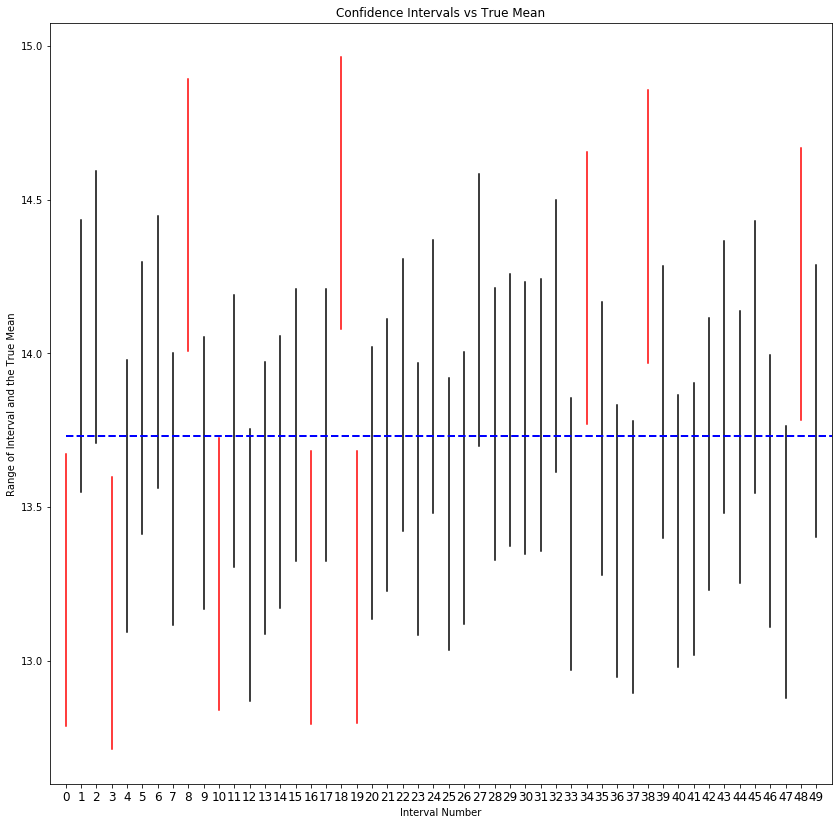

In [76]:
def confidence_intervals(m=500, n=100):
    #Your code here
    # mu and beta
    mu = 12.0
    beta = 3.0
    # defining the plot
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14,14))
    # list of confidence intervals
    cis = []
    # alpha for confidence interval
    alpha = .25
    #calculating the true mean
    truemean = 12.0 + (3.0*np.euler_gamma)
    # take n samples m times
    for i in range(0,m):
        # pull from gumbel distribution randomly
        x = stats.gumbel_r.rvs(loc=mu, scale=beta, size=n)
        # calculate x mean from random distribution
        xbar = np.mean(x)
        # calculate z alpha on 99%
        zalpha = stats.norm.ppf(1.0-(alpha/2.0))
        # calculate true standard deviation of gumbel distribution
        standard = np.pi*3.0/np.sqrt(6.0)
        #compute lower and upper confidence interval
        lower = xbar-(zalpha*standard/np.sqrt(n))
        upper = xbar+(zalpha*standard/np.sqrt(n))
        # append lower and upper confidence interval
        cis.append([lower,upper])
    
    # picking 50 random samples
    samples = []
    # keep track of how many we have chosen
    samplesize = 0
    # until we have chosen 50 keep choosing
    while samplesize < 50:
        # pick random number from 0 to 499
        rand = np.random.randint(0, 500)
        # if it hasn't been chosen then add it and increment samples
        if rand not in samples:
            samples.append(rand)
            samplesize += 1
    # plot all of the random samples chosen
    for i in range(0,50):
        # if the interval has the true mean change the color to black, else red
        if truemean >= cis[samples[i]][0] and truemean <= cis[samples[i]][1]:
            ax.plot([i, i], cis[samples[i]], color="black")
        else:
            ax.plot([i, i], cis[samples[i]], color="red")
    
    # labeling the graph
    ax.set_title("Confidence Intervals vs True Mean")
    ax.set_ylabel("Range of Interval and the True Mean")
    ax.set_xlabel("Interval Number")
    # plotting the true mean
    ax.plot([0,50], [truemean, truemean], color="blue", ls='--', lw=2)
    # setting the limits and the x ticks
    ax.set_xlim([-1, 50])
    plt.xticks(range(50), fontsize=12)
    # calculating how many out of the 500 samples confidence intervals have the true mean
    proportion = 0
    for i in cis:
        if truemean >= i[0] and truemean <= i[1]:
            proportion += 1
    proportion /= m
    print("The proportion of confidence intervals that contain the true mean is: ", proportion)
    
# calling our function
confidence_intervals()

**Part E:** Does the proportion of confidence intervals that cover the true mean of the distribution agree with the theory described in class?  Justify your conclusion. 

Yes, because using the 75% confidence interval around 75% of the intervals have the true mean in them, which is the definition from class, which is that we are 75% confident that the true mean is within our interval. 

---

<a id='p4'></a>
[Back to top](#top)

### [15 points] Problem 4 - Freethrow Throwbacks
***

Keep your skills sharp by answering these straightforward questions.

**Part A**: <font color='green'>Your Michael Jordan in his prime...It's the sixth game of the 1998 NBA Finals and Byron Russel fouls you, but when you step up to take the freethrow, your transported to a CSCI 3022 classroom. Solve the following to "make" the freethrow:</font>

You have a shuffled deck of cards. It includes the usual 52 cards and 2 Jokers. You flip over the cards one by one, without replacing them in the deck. You count how many cards you'll have to flip until you flip four of the following five cards: the six of hearts, the eight of diamonds, the king of clubs, and both of the jokers.  You repeat this many times. 

Simulate this process at least 25000 times. Plot a histogram with binsize=1 of the outcomes, in lightgrey with white outline. Compute the mean, median, and mode for this dataset, indicate them on the plot using a line, with linstyles of green dashed, red dotted, and black solid, respectively. Use a legend to label your histogram (of the distribution of flips), mean, median. Does this data look positively or negatively skewed? Explain below in a markdown cell, talk about the mean, median, and the shape of the histogram in your answer.

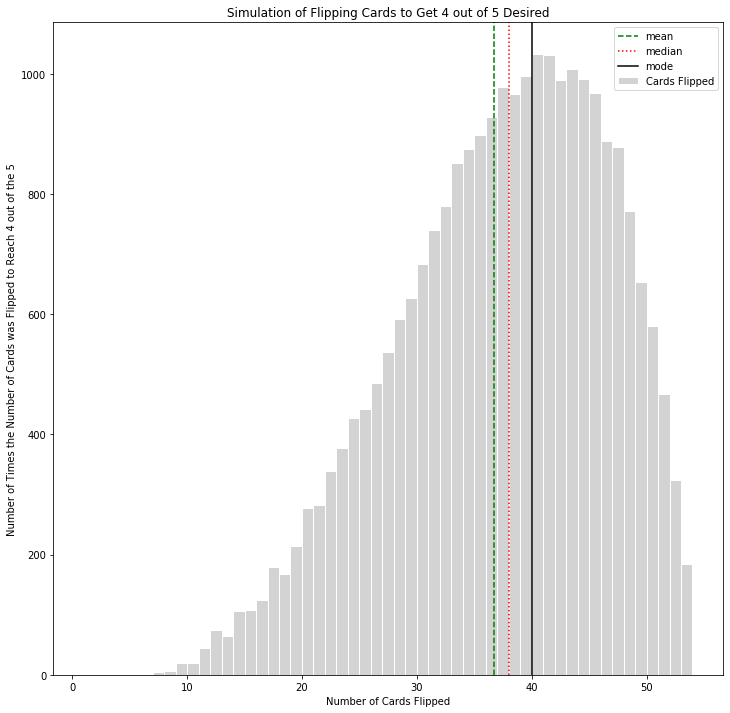

In [194]:
# our deck of cards
deck = ["AD","2D", "3D", "4D", "5D", "6D", "7D", "8D", "9D", "10D", "JD", "QD", "KD",
            "AC","2C", "3C", "4C", "5C", "6C", "7C", "8C", "9C", "10C", "JC", "QC", "KC",
            "AS","2S", "3S", "4S", "5S", "6S", "7S", "8S", "9S", "10S", "JS", "QS", "KS",
            "AH","2H", "3H", "4H", "5H", "6H", "7H", "8H", "9H", "10H", "JH", "QH", "KH", "RJ", "BJ"]
# this simulates flipping cards until we get the ones we want
def simulate():
    # how many cards we have flipped
    count = 0
    # the number of wanted cards we've gotten
    wanted = 0
    # the list of cards we want
    wants = ["6H", "8D", "KC", "BJ", "RJ"]
    # cards we have flipped so far
    cardsgotten = []
    # if we have gotten four of the wanted then stop
    while wanted < 4:
        # get a random card from the deck
        flipped = np.random.choice(deck)
        # if we haven't gotten it before
        if flipped not in cardsgotten:
            # increment how many we have flipped
            count += 1
            # add it to the cards we have gotten
            cardsgotten.append(flipped)
            # if it is one of the cards we wanted increment wanted
            if flipped in wants:
                wanted += 1
    # return how many cards we flipped
    return count

# run the test 25000 times and store the results in a list
cardsflipped = []
for i in range(0, 25000):
    cardsflipped.append(simulate())
    
# calculate mean, median, mode
mean = np.average(cardsflipped)
median = np.median(cardsflipped)
modelist = stats.mode(cardsflipped, axis=None)
mode = modelist[0]

# plot all the data we have gotten and label stuff
fig, ax = plt.subplots(figsize=(12,12))
mybins = range(1, 55, 1)
ax.hist(cardsflipped, color='lightGrey', edgecolor='white', bins=mybins, label="Cards Flipped")
ax.axvline(x=mean, color='green', ls='--', label='mean')
ax.axvline(x=median, color='red', ls=':', label='median')
ax.axvline(x=mode, color='black', ls='-', label='mode')
ax.legend()
ax.set_ylabel("Number of Times the Number of Cards was Flipped to Reach 4 out of the 5")
ax.set_xlabel("Number of Cards Flipped")
ax.set_title("Simulation of Flipping Cards to Get 4 out of 5 Desired")
# it prints a dumb thing so random print that isn't ugly to prevent ugly print
print()

mean median shape
From the data it appears that the data is negatively shaped. The shape of the histogram appears to be that of a negative skew. Also the mean is left of the median which further suggests that it is a negative skew.

***

**Part B**: <font color='green'> Now you're back up for another freethrow, but this time you've been transported to the third overtime of the famous [1976 NBA Finals Game Five](https://www.youtube.com/watch?v=3ZjNDvuMxzc). You line up for a freethrow, but oddly enough you're again transported back to CSCI 3022... Why does this keep happening? If you solve this problem, you make the freethrow:</font>

In general, which is wider: a 95% confidence interval or a 99% confidence interval? How would you explain this to your younger sibling, who is not a statistician?

The 99% confidence interval is wider than the 95% confidence interval. This, little Timmy, is because the larger area you have, the more likely it is that your point is in that area. If you have a small area, then you can't be sure you hit the point.

***

**Part C**: <font color='green'>The crowd is silent... Because there is no crowd... And it's not a basketball game...  You're Will Smith and it's 1998. You've got an important decision to make: You've been offered the lead role in both a sci-fi flick and a steampunk western action comedy. If you make this "freethrow", Will Smith takes the sci-fi role and stars in "The Matrix" as Neo. If you fail to solve this question, Will Smith makes the blunder of turning down the "Matrix" to appear in "Wild Wild West" and history remains unchanged.
</font>

Let $X$ be a normally-distributed random variable. You draw from it and get these values, stored in the numpy array **smith**, below. These represent the probabilities of him taking the role in the matrix, calculated by differant "statistical measures". Compute a 95% confidence interval for the _variance_.


In [9]:
smith = np.array([0.67832,0.113,0.423,0.279,0.580,0.401,0.189, 0.198, 0.147, 0.103, 0.098])

standardsmith = calcstd(smith)
nsmith = len(smith)
lower = stats.chi2.ppf(1.0-.025, nsmith-1)
upper = stats.chi2.ppf(.025, nsmith-1)
lower = ((nsmith-1)*(standardsmith**2))/lower
upper = ((nsmith-1)*(standardsmith**2))/upper

print("[", lower, ",", upper, "]")

[ 0.019882925509039362 , 0.12542928968589584 ]


The confidence interval for variance uses chi2 which is calculated with the above python using this formula for the lower and upper bounds.
$$
[\frac{(n-1)*s^2}{\chi ^2_{1-\alpha /2, n-1}}],[\frac{(n-1)*s^2}{\chi ^2_{\alpha /2, n-1}}]
$$
So the 95% confidence interval is [0.01989,0.1254]


***

**Part D**: <font color='green'>Now we're back to basketball...You're Askia Booker, former CU point guard. It's the [2013 KU game](https://www.youtube.com/watch?v=-ycTB27RlEc) and your take the ball with 2.7 seconds left. To sink the three and win the game, solve the following: </font>

If you're doing quality control for the average strength of carbon fiber that will be used in airplane construction, and your alternative hypothesis is that the strength of the carbon is below tolerance, and therefore unsafe, would you rather have a low Type I error rate or a low Type II error rate? Explain.


A low type II error rate would be better. Type II error would mean we accepted the null hypothesis when we should have rejected. This means that we said it was average however the strength of the carbon was below average. This would lead to safety issues and failures. A high type I would mean that we reject when we should have accepted which would just mean that sometimes materials that are ok to use would be rejected which isn't that big of a deal.


***

**Part E**: <font color='green'>Well, we haven't stopped time traveling yet.... But now we're in the soccor world. Your a striker in the [1994 Fifa World Cup Final](https://www.youtube.com/watch?v=pLPM_JSbGvI) between Brazil and Italy. Solve this problem to make a penalaty kick during the final shootout:</font>

You measure 49 suckers from baby reef octopuses and find that they are, on average, 47.2 mm wide, with a standard devaition of 29.2mm. 

Then you measure 65 suckers from from baby dumbo octopuses and find that they are, on average, 63.9 mm wide, with a standard deviation of 19.6 mm. 

Is there statistical evidence at the 0.025 significance level that the true mean of baby dumbo octopus sucker width exceeds the true mean of baby reef octopus sucker width by more than 7 mm?  Use a test of your choice.

In order to calculate this we want the formula
$$
zstat = \frac{\bar x_1 - \bar x_2 - \Delta}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}} = \frac{63.9 - 47.2 - 7}{\sqrt{\frac{19.6^2}{65}+\frac{29.2^2}{49}}}
$$
which gives us zstat, which we can plug into  the normal cdf to see if our significance level is above or equal to 0.025 <br>
the answer is calculated below using python, 0.02227
this means that our significance level is below 0.025 therefore there is no statistical evidence suggesting that the true mean of the baby dumbo octopus sucker width exceeds the true mean of baby reef octopus by 7 mm

In [13]:
top = 63.9 - 47.2 - 7
bot = (19.6**2)/65
bot += ((29.2**2)/49)
bot = np.sqrt(bot)
zstat = top/bot
answer = 1-stats.norm.cdf(zstat)
print(answer)

0.02226571592072224
